# Homework 5

## REST API

We begin by fetching JSON data from the Nobel Prize REST API using the website provided in the homework.

In [2]:
# We start importing requests in order to get data from the web API
import requests

URL = "http://api.nobelprize.org/2.1/nobelPrize/phy/2022"
response = requests.get(URL) # Get data from the API

data = response.json() # Convert to JSON format
data 

[{'awardYear': '2022',
  'category': {'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'},
  'categoryFullName': {'en': 'The Nobel Prize in Physics',
   'no': 'Nobelprisen i fysikk',
   'se': 'Nobelpriset i fysik'},
  'dateAwarded': '2022-10-04',
  'prizeAmount': 10000000,
  'prizeAmountAdjusted': 10000000,
  'links': [{'rel': 'nobelPrize',
    'href': 'https://api.nobelprize.org/2/nobelPrize/phy/2022',
    'action': 'GET',
    'types': 'application/json'}],
  'laureates': [{'id': '1012',
    'knownName': {'en': 'Alain Aspect'},
    'fullName': {'en': 'Alain Aspect'},
    'portion': '1/3',
    'sortOrder': '1',
    'motivation': {'en': 'for experiments with entangled photons, establishing the violation of Bell inequalities and  pioneering quantum information science',
     'se': 'för experiment med sammanfätade fotoner som påvisat brott mot Bell-olikheter och  banat väg för kvantinformationsvetenskap'},
    'links': [{'rel': 'laureate',
      'href': 'https://api.nobelprize.org/2/laureate/

We have retrieved the data and will now extract all prize motivations from the JSON list to visualize their word frequencies using a word cloud.

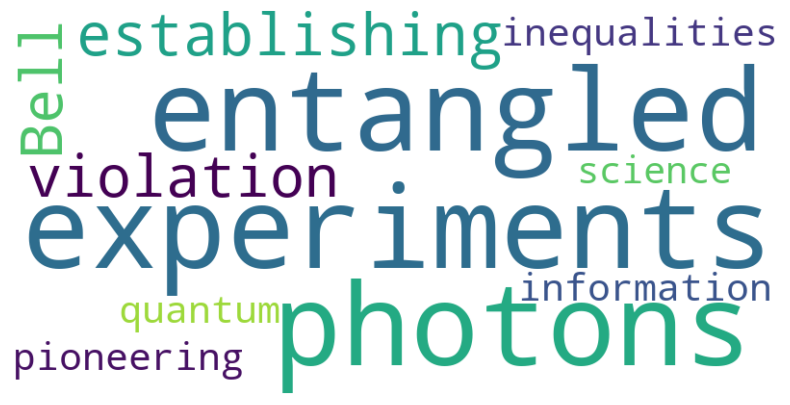

In [14]:
# Importing wordcloud and matplotlib in order to visualise the wordcloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt 

# Extract motivations
nobel_prizes = data['nobelPrizes']  
prize = nobel_prizes[0]  

# Combine all motivations into one string
motivations = " ".join([laureate['motivation']['en'] for laureate in prize['laureates']])

# Generate the word cloud
wordcloud = WordCloud(stopwords=STOPWORDS, width=800, height=400, background_color='white').generate(motivations)

# Visualize the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


After creating the word cloud we notice that words closely relates to physics such as "photons" and "experiments" for instance, are especially noticeable. 

## Web Scraping

Our goal is to scrape data to retrieve the UPC, title, price, and rating of various books.

In [34]:
from bs4 import BeautifulSoup
import pandas as pd

URL = "https://books.toscrape.com/catalogue/page-{}.html"
book_data = []

# Scrape the first 3 pages
for page in range(1, 4):
    response = requests.get(BASE_URL.format(page))
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all books on the page
    books = soup.find_all('article', class_='product_pod')
    
    for book in books:
        title = book.h3.a['title']
        price = book.find('p', class_='price_color').text
        rating = book.p['class'][1]  

        # Get the link to the book's detail page
        relative_url = book.h3.a['href']
        book_url = 'https://books.toscrape.com/catalogue/' + relative_url
        
        # Fetch the book's detail page to get the UPC
        book_response = requests.get(book_url)
        book_soup = BeautifulSoup(book_response.content, 'html.parser')
        upc = book_soup.find('th', string='UPC').find_next_sibling('td').text
       
        # Add title, price and rating to book_data
        book_data.append({
            "upc": upc,
            "title": title,
            "price": price,
            "rating": rating
        })
        
# Convert the list to a DataFrame
df = pd.DataFrame(book_data)
df

,upc,title,price,rating
0,a897fe39b1053632,A Light in the Attic,£51.77,Three
1,90fa61229261140a,Tipping the Velvet,£53.74,One
2,6957f44c3847a760,Soumission,£50.10,One
3,e00eb4fd7b871a48,Sharp Objects,£47.82,Four
4,4165285e1663650f,Sapiens: A Brief History of Humankind,£54.23,Five
5,f77dbf2323deb740,The Requiem Red,£22.65,One
6,2597b5a345f45e1b,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four
7,e72a5dfc7e9267b2,The Coming Woman: A Novel Based on the Life of...,£17.93,Three
8,e10e1e165dc8be4a,The Boys in the Boat: Nine Americans and Their...,£22.60,Four
9,1dfe412b8ac00530,The Black Maria,£52.15,One


We have successfully retrieved all the necessary information, that is UPC, title, price, and rating.